In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st

In [3]:
matches=pd.read_csv("matches.csv")
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Q.1 Take the win_by_wickets dataset and plot frequency distribution graph

On x-axis - Win by Wickets on y-axis Win by Wickets margin

1      3
2      6
3     18
4     41
5     71
6     85
7     80
8     54
9     37
10    11
Name: win_by_wickets, dtype: int64


Text(0, 0.5, 'Frequency')

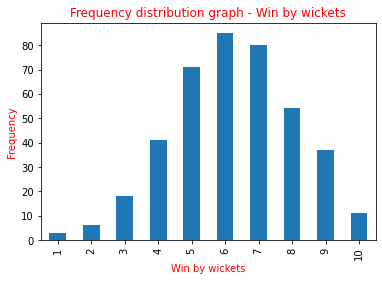

In [5]:
win_by_wic_data=matches[matches.win_by_wickets>0].win_by_wickets
win_by_wic_freq=win_by_wic_data.value_counts(sort=False)
print(win_by_wic_freq)
win_by_wic_freq.plot.bar()
plt.title("Frequency distribution graph - Win by wickets",color='red')
plt.xlabel("Win by wickets",color='r')
plt.ylabel("Frequency",color='r')


### Q.2 Relative frequency distribution graph using the same data set win_by_wickets

Hint: use normalize = True argument for pandas.Series.value_counts

Instead of showing frequency show percentage of values

1     0.007389
2     0.014778
3     0.044335
4     0.100985
5     0.174877
6     0.209360
7     0.197044
8     0.133005
9     0.091133
10    0.027094
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Relative frequency (%)')

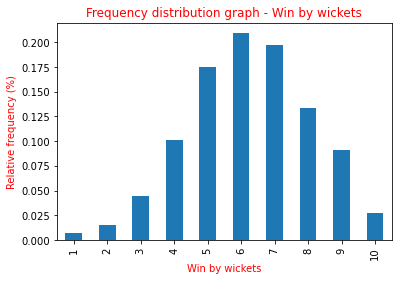

In [6]:
win_by_wic_rel_freq=win_by_wic_data.value_counts(sort=False , normalize=True)
print(win_by_wic_rel_freq)
win_by_wic_rel_freq.plot.bar()
plt.title("Frequency distribution graph - Win by wickets",color='red')
plt.xlabel("Win by wickets",color='r')
plt.ylabel("Relative frequency (%)",color='r')


### Q.3 Plot Cumulative relative frequency graph

Use function pandas.Series.cumsum

1     0.007389
2     0.022167
3     0.066502
4     0.167488
5     0.342365
6     0.551724
7     0.748768
8     0.881773
9     0.972906
10    1.000000
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Relative frequency (%)')

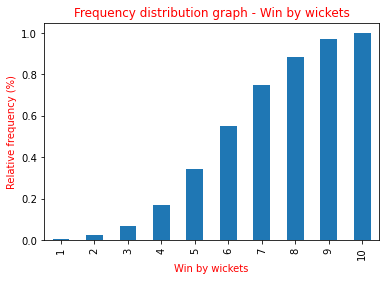

In [7]:
win_by_wic_cum_freq=win_by_wic_data.value_counts(sort=False , normalize=True).cumsum()
print(win_by_wic_cum_freq)
win_by_wic_cum_freq.plot.bar()
plt.title("Frequency distribution graph - Win by wickets",color='r')
plt.xlabel("Win by wickets",color='r')
plt.ylabel("Relative frequency (%)",color='r')


 ### Q.4 Find out the probability of winning a match by 6 wickets or less?

Find out the probability using the cumulative relative frequency graph

Draw a vertical line from 6 on x-axis till it intercepts the curve and the draw the horizontal line till it intercepts y-axis

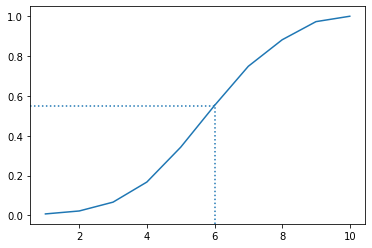

In [9]:
plt = win_by_wic_cum_freq.plot.line()
plt.axhline(y = win_by_wic_cum_freq[6], xmax = 5.5/10, linestyle='dotted')
plt.axvline(x = 6, ymax = win_by_wic_cum_freq[6], linestyle='dotted')

## Q.5 
### Plot the normal distribution for win_by_wickets data.



### Calculate mean and standard deviation for win_by_wickets data

### Plot Histogram

### Plot Line Graph

### Plot Normal distribution between 1 and 10 using mean and standard deviation as calculated above

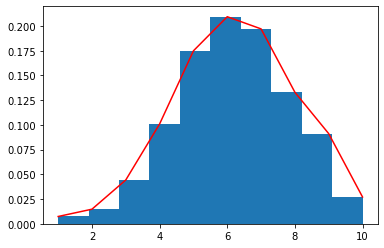

In [10]:
win_by_wic_mean,win_by_wic_std = win_by_wic_data.mean(),win_by_wic_data.std()
win_by_wic_data.hist(weights = np.zeros_like(win_by_wic_data) + 1.0 / win_by_wic_data.count())
win_by_wic_data.value_counts(sort=False, normalize=True).plot.line(color='red')
random_data = np.arange(1, 100, 0.01)
plt.plot(random_data, stats.norm.pdf(random_data, win_by_wic_mean, win_by_wic_std), color='green')

## Q.6
### Calculate z-score if the team wins by 35 runs.

### Calculate mean and standard deviation for win_by_wickets data

Use win_by_runs dataset

In [8]:
win_by_runs_data=matches[matches.win_by_runs>0].win_by_runs
win_by_runs_std_dev = win_by_runs_data.std()
win_by_runs_mean = win_by_runs_data.mean()
z_score_35 = (35- win_by_runs_mean)/win_by_runs_std_dev
print(f' score if team wins by 35 runs is {z_score_35:.2f}')

 score if team wins by 35 runs is 0.19


# Q.7
## Calculate percentile using z-score

In [10]:
z_score = stats.norm.cdf(0.19)
print(f'z_score of 0.19 is {z_score *100:.2f} percentile' )

z_score of 0.19 is 57.53
